# BASE DATA LOADING 

# AUGMENTED DATA LOADING

In [8]:
import json
import numpy as np
import cv2
import os
from glob import glob
# from utils import *
import tensorflow as tf
from tensorflow import keras 
from keras.models import Sequential
from keras.models import Model
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from keras import optimizers, losses, activations, models
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate
from tensorflow.keras import applications
from tensorflow.keras.optimizers import Adam


In [9]:
x  = np.load("aug_images_train.npy")
Labels = np.load("aug_label_train.npy")

In [10]:
X_train , X_test, y_train , y_test = x ,np.load("./data/test_image.npy") , Labels , np.load("./data/test_label.npy")

In [11]:
normal_imgss = [np.dstack((X_test[i], X_test[i], X_test[i])) for i in range(0,len(X_test))]
# imgss = [np.stack((imgs[i], imgs[i], imgs[i]), axis=2) for i in range(0,len(imgs_test))]
X_test = np.array(normal_imgss)

In [12]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)

# INCEPTION

In [20]:
dim = 128
input_shape = (dim,dim, 3)
nclass = 4

base_model = applications.InceptionV3(weights='imagenet', 
                                include_top=False, 
                                input_shape=(dim,dim,3))
base_model.trainable = False

add_model = Sequential()
add_model.add(base_model)
add_model.add(keras.layers.Flatten())
add_model.add(keras.layers.BatchNormalization())
add_model.add(keras.layers.Dense(1024, activation='relu'))
add_model.add(keras.layers.Dropout(0.5))
add_model.add(keras.layers.BatchNormalization())
add_model.add(keras.layers.Dense(256, activation='relu'))
add_model.add(keras.layers.Dropout(0.5))
add_model.add(keras.layers.BatchNormalization())
add_model.add(keras.layers.Dense(64, activation='relu'))
add_model.add(keras.layers.Dropout(0.5))
add_model.add(keras.layers.BatchNormalization())
add_model.add(Dense(nclass, activation='softmax'))

model = add_model
model.compile(optimizer = Adam(learning_rate=0.0001,beta_1=0.95,beta_2=0.9996,epsilon=1e-08) ,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 batch_normalization_192 (Ba  (None, 8192)             32768     
 tchNormalization)                                               
                                                                 
 dense_4 (Dense)             (None, 1024)              8389632   
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 batch_normalization_193 (Ba  (None, 1024)             4096      
 tchNormalization)                                    

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from livelossplot import PlotLossesKerasTF

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.0002, mode='min')
# checkpoint = ModelCheckpoint("resnet_v250", monitor='val_accuracy',
#                              save_weights_only=True, mode='max', verbose=1)
earlyStop = EarlyStopping(
    monitor='val_loss',
    patience=8,
    verbose=1,
    mode='auto',
    restore_best_weights=True,
)
callbacks = [PlotLossesKerasTF(), reduce_lr, earlyStop]

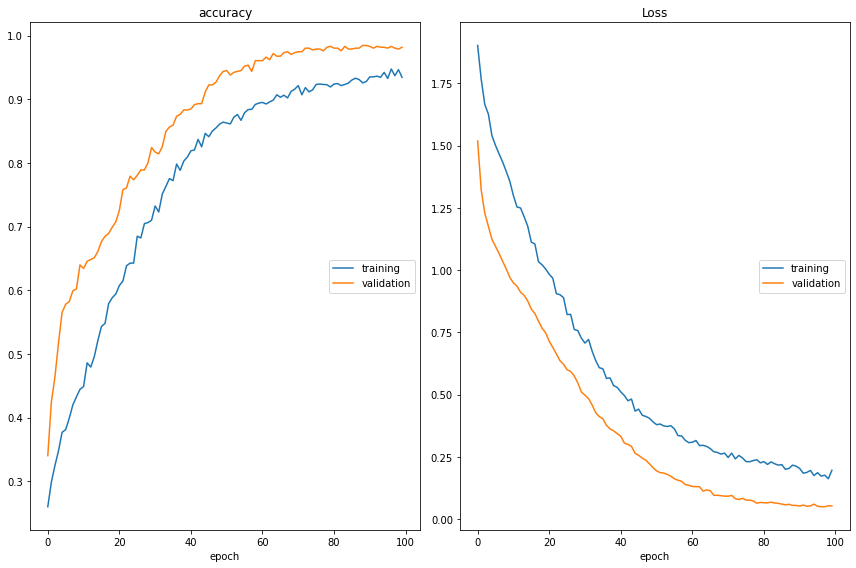

accuracy
	training         	 (min:    0.260, max:    0.948, cur:    0.935)
	validation       	 (min:    0.340, max:    0.985, cur:    0.982)
Loss
	training         	 (min:    0.162, max:    1.902, cur:    0.195)
	validation       	 (min:    0.049, max:    1.519, cur:    0.052)
89/89 [==============================] - 5s 54ms/step - loss: 0.1953 - accuracy: 0.9345 - val_loss: 0.0522 - val_accuracy: 0.9817 - lr: 1.0000e-04


In [22]:
history = model.fit(X_train,y_train,batch_size = 32,
                              epochs=100, 
                              shuffle=True, 
                              verbose=True,
                              validation_split=0.2,
                              callbacks=callbacks,
                              )

In [23]:
import matplotlib.pyplot as plt 

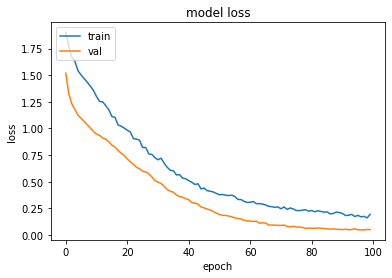

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [25]:
model.save("saved_model/inceptionv3")

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on

In [13]:
x.shape 

(3552, 128, 128, 3)

In [14]:
from tensorflow import keras
model = keras.models.load_model('saved_model/inceptionv3')

In [15]:
y_pred = model.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [16]:
y_train

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

In [17]:
y_pred

array([[3.63662170e-04, 1.50955253e-04, 9.99095917e-01, 3.89405584e-04],
       [3.03044647e-01, 9.32799280e-03, 6.81481540e-01, 6.14577299e-03],
       [7.06833482e-01, 2.68696666e-01, 1.39468173e-02, 1.05230128e-02],
       [5.38900355e-03, 4.11113724e-03, 9.87009406e-01, 3.49040492e-03],
       [9.22906160e-01, 1.21054612e-02, 4.44095358e-02, 2.05787495e-02],
       [2.04810109e-02, 9.14314091e-01, 2.44541354e-02, 4.07507643e-02],
       [4.60412027e-03, 3.28770746e-03, 9.88993943e-01, 3.11423535e-03],
       [6.25734687e-01, 8.73707011e-02, 2.79997200e-01, 6.89737312e-03],
       [7.38196611e-01, 9.37803462e-02, 1.62151173e-01, 5.87187149e-03],
       [5.87661564e-03, 7.15047002e-01, 1.44433053e-02, 2.64633060e-01],
       [1.17217422e-01, 3.79907675e-02, 8.33171487e-01, 1.16203139e-02],
       [6.64400449e-03, 9.66293216e-01, 2.49782410e-02, 2.08448269e-03],
       [2.98148114e-02, 9.38749790e-01, 2.85275932e-02, 2.90781143e-03],
       [1.68049737e-04, 9.99589264e-01, 8.62844390e

In [18]:
np.zeros((1,3))


array([[0., 0., 0.]])

In [19]:
y_pred_new = []
for i  in y_pred : 
    y_pred_new.append(i.argmax(axis=0))

In [20]:
y_round = y_pred_new

In [21]:
from sklearn.metrics import multilabel_confusion_matrix

print(multilabel_confusion_matrix(y_test,y_round))

[[[164  18]
  [ 31   9]]

 [[ 90  42]
  [ 56  34]]

 [[ 80  58]
  [ 33  51]]

 [[206   8]
  [  6   2]]]


In [22]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_round)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.33333333 0.44736842 0.46788991 0.2       ]
recall: [0.225      0.37777778 0.60714286 0.25      ]
fscore: [0.26865672 0.40963855 0.52849741 0.22222222]
support: [40 90 84  8]


In [24]:
from sklearn.metrics import multilabel_confusion_matrix , accuracy_score
import matplotlib.pyplot as plt 

mx = multilabel_confusion_matrix(y_test,y_pred_new)
acc = accuracy_score(y_test,y_round)

In [25]:
acc

0.43243243243243246

In [26]:
mx

array([[[164,  18],
        [ 31,   9]],

       [[ 90,  42],
        [ 56,  34]],

       [[ 80,  58],
        [ 33,  51]],

       [[206,   8],
        [  6,   2]]])

: 

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.get_cmap("Blues")):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

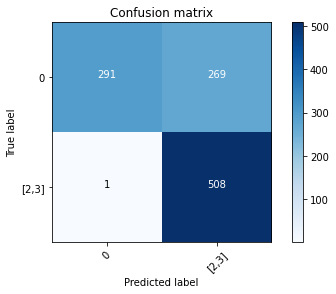

In [ ]:
plot_confusion_matrix(mx[0],['0','[2,3]'])

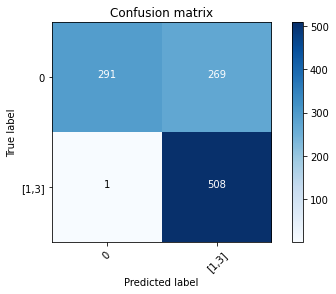

In [ ]:
plot_confusion_matrix(mx[0],['0','[1,3]'])

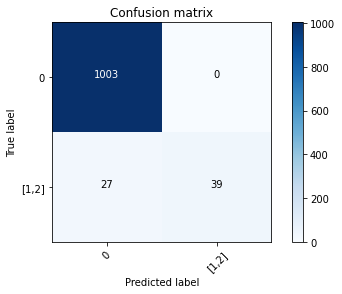

In [ ]:
plot_confusion_matrix(mx[2],['0','[1,2]'])

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns

classes=['Grade 0', 'Grade 1', 'Grade 2']
CMatrix = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = classes, index = classes)

plt.figure(figsize=(10, 6))
ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);
ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set', fontsize = 19, weight = 'bold', pad=20);
plt.savefig("confusion_matrix.png")

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [ ]:
pip install wandb

  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: six
    Found existing installation: six 1.12.0
    Uninstalling six-1.12.0:
      Successfully uninstalled six-1.12.0
Note: you may need to restart the kernel to use updated packages.


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: chiragtech. Use `wandb login --relogin` to force relogin


acc,▂▁▅▇▇▇▇█
loss,█▃▂▃▃▁▂▁
acc,0.94266
loss,0.07427


In [ ]:
# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="Furcation-grading",
    
    # track hyperparameters and run metadata
    config={
    "architecture": "InceptionV3",
    "dataset": "X_train",
    'Dataset':"X_train",
    "epochs": 100,
    "callbacks":"callbacks",
    "optimizer":"Adam",
    "learning_rate":0.0001,
    "beta_1":0.95,
    'beta_2':0.9999,
    'epsilon':1e-09,
    'loss':'categorical_crossentropy'
    }
)

# simulate training
epochs = 100
offset = random.random() / 5
for epoch in range(2, epochs):
    acc = 1 - 2 ** -epoch - random.random() / epoch - offset
    loss = 2 ** -epoch + random.random() / epoch + offset
    
    # log metrics to wandb
    wandb.log({"acc": acc, "loss": loss})
    
# [optional] finish the wandb run, necessary in notebooks
wandb.finish()

acc,▁▆██▇▇██████████████████████████████████
loss,█▄▂▁▂▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
acc,0.98676
loss,0.01503


: 

In [ ]:
pip install --ignore-installed six

  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
Note: you may need to restart the kernel to use updated packages.
